# DIO - ETL com Python

**Valorant Champions Analytics: Além dos Números**
- No coração do jogo Valorant, desempenho e estratégia convergem para criar um ambiente onde jogadores e times buscam dominar o campo de batalha.
- O projeto envolve análises e estatísticas dos campeões do torneio Valorant Champions2022, explorando muito mais do que simples números. Através de visualizações gráficas que destacam alguns aspectos desse torneio único.


## **E**xtract

Extraindo dados de a partir do arquivo CSV "valorant_champions_istanbul". Atribuindo colunas específicas do conjunto de dados a variáveis separadas:
- Player: Nomes dos jogadores
- Team: Nomes dos times dos jogadores
- Nationality: Nacionalidade dos jogadores
- K/D: Relação entre abates e mortes dos jogadores
- Rank: Classificação dos jogadores

In [11]:
#inportação das bibliotecas necessarias
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

# Carregar dados do CSV usando o pandas
data = pd.read_csv('valorant_champions_istanbul.csv')

#Atribuindo colunas especificas: Player,Team,Nationality,K/D,Rank
plays = data['Player']
team = data['Team']
nationality = data['Nationality']
kd = data['K/D']
rank = data['Rank']

# Imprimindo os primeiros registros para verificação utilizando o metodo .head()
print("Player:", plays.head())
print("Team:", team.head())
print("Nationality:", nationality.head())
print("K/D", kd.head())
print("Rank", rank.head())


Player: 0       Sacy
1    saadhak
2    pANcada
3       Less
4      aspas
Name: Player, dtype: object
Team: 0    LOUD
1    LOUD
2    LOUD
3    LOUD
4    LOUD
Name: Team, dtype: object
Nationality: 0       Brazil
1    Argentina
2       Brazil
3       Brazil
4       Brazil
Name: Nationality, dtype: object
K/D 0    1.20
1    1.05
2    1.23
3    1.31
4    1.05
Name: K/D, dtype: float64
Rank 0    1
1    1
2    1
3    1
4    1
Name: Rank, dtype: int64


## **T**ransform

Realizar Transformações nos Dados
- Ações Realizadas: Análise e transformação dos dados extraídos do arquivo CSV
- Objetivo: Preparar os dados para criação de gráficos informativos.

1. Agrupamento e Cálculo de Médias por Equipe/Time e Região/Nacionalidade
   - Dados Agrupados por Equipe/Time e Região/Nacionalidade
   - Cálculo das Médias de K/D Ratio e Rank
   - Impressão dos resultados
2. Ordenação dos Times e Regiões:
   - Ordenação Baseada em K/D Ratio ou Rank (Opção Selecionada)
   - Resultados Ordenados para Avaliação
   - Impressão dos resultados
3. Análise de Correlação entre Métricas Selecionadas:
   - Seleção de Colunas para Análise de Correlação
   - Cálculo da Matriz de Correlação entre as Métricas
   - Impressão dos resultados


1. Agrupamento e Cálculo de Médias por Equipe Baseada em K/D e Rank


In [12]:
# Realizar transformações
team_kd_rank = data.groupby('Team')[['K/D', 'Rank']].mean().reset_index()
"""Agrupando os dados com base na coluna 'Team'. Seleciona as colunas 'K/D'e 'Rank'
e calcula a média dessas duas colunas para cada time/equipe."""

# Ordenação dos times pelo K/D 
team_kd_rank = team_kd_rank.sort_values(by='K/D', ascending=False)  

# Imprimindo os resultados
print(team_kd_rank)

   Team    K/D  Rank
4  LOUD  1.168   1.0
1   FNC  1.130   5.0
5  OPTC  1.014   2.0
7  XSET  1.008   5.0
0   DRX  0.968   3.0
2   FPX  0.960   4.0
3   LEV  0.950   6.0
6    TL  0.822   6.0


2. Agrupamento e Cálculo de Médias por Nacionalidade Baseada em K/D e Rank

In [13]:
# Realizar transformações
region_kd_rank = data.groupby('Nationality')[['K/D', 'Rank']].mean().reset_index()
"""Agrupando os dados com base na coluna 'Nationality'. Seleciona as colunas 'K/D' e 'Rank'
e c alcula a média dessas duas colunas para cada nacionalidade/região."""

# Ordenar as regiões pelo K/D
region_kd_rank = region_kd_rank.sort_values(by='K/D', ascending=False)  

# Imprimindo os resultados
print(region_kd_rank)

       Nationality       K/D  Rank
12          Turkey  1.250000  5.00
2           Brazil  1.197500  1.00
5          Finland  1.145000  5.50
6           France  1.110000  5.00
15   United States  1.076667  3.50
9           Latvia  1.070000  4.00
11         Sweeden  1.060000  4.00
0        Argentina  1.050000  1.00
7    International  1.040000  4.00
10     South Corea  0.968000  3.00
4            Chile  0.950000  6.00
3           Canada  0.940000  3.00
14  United Kingdom  0.870000  5.25
1          Belgium  0.865000  6.00
8       Kazakhstan  0.730000  6.00
13         Ukraine  0.590000  4.00


3. Análise de Correlação entre Métricas e Cálculo da Matriz

In [14]:
# Selecionar as colunas relevantes para análise de correlação
columns_for_correlation = ['Kill', 'Death', 'K/D', 'Rounds Played', 'Rounds Win', 'Rounds Lose', 'HS %', 'Rank']
"""O código cria uma lista que inclui os nomes das colunas que serão usadas
para calcular a matriz de correlação."""

# Calcular a matriz de correlação
correlation_matrix = data[columns_for_correlation].corr()

# Imprimindo os resultados
print(columns_for_correlation, correlation_matrix)

['Kill', 'Death', 'K/D', 'Rounds Played', 'Rounds Win', 'Rounds Lose', 'HS %', 'Rank']                    Kill     Death       K/D  Rounds Played  Rounds Win  \
Kill           1.000000  0.905112  0.394385       0.933555    0.888123   
Death          0.905112  1.000000  0.014958       0.978085    0.889952   
K/D            0.394385  0.014958  1.000000       0.138445    0.215021   
Rounds Played  0.933555  0.978085  0.138445       1.000000    0.933529   
Rounds Win     0.888123  0.889952  0.215021       0.933529    1.000000   
Rounds Lose    0.850645  0.932919  0.040441       0.929507    0.735503   
HS %           0.106398  0.070879  0.067249       0.058541    0.102347   
Rank          -0.775334 -0.734933 -0.275476      -0.799683   -0.947240   

               Rounds Lose      HS %      Rank  
Kill              0.850645  0.106398 -0.775334  
Death             0.932919  0.070879 -0.734933  
K/D               0.040441  0.067249 -0.275476  
Rounds Played     0.929507  0.058541 -0.799683  
R

## **L**oad

Carregamento do processamento e análise dos dados coletados. Utilizando gráficos para visualizar informações cruciais que ajudaram a compreender melhor o desempenho dos jogadores, times e nacionalidades no torneio Valorant Champions Istanbul.
- Visualizações gráficas para apresentar de maneira clara e concisa as tendências, relações e padrões contidos nos dados agregados. 
- Criação de gráficos informativos, destacando os elementos importantes que surgem dos dados agrupados, fornecendo uma visão panorâmica e detalhada das diferentes análises. 


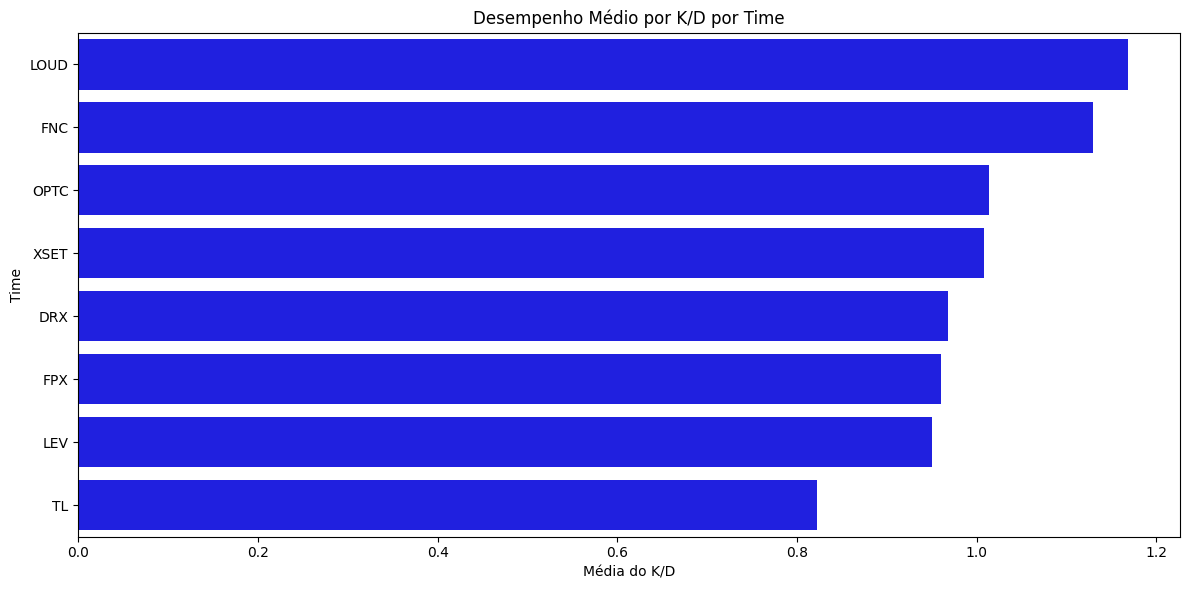

In [15]:
# Criar um gráfico de barras para comparar a média do K/D Ratio ou do Rank por time
plt.figure(figsize=(12, 6))

# Comparar pelo K/D 
sns.barplot(x='K/D', y='Team', data=team_kd_rank, color='blue') 

plt.xlabel('Média do K/D')
plt.ylabel('Time')
plt.title('Desempenho Médio por K/D por Time')
plt.tight_layout()

# Salvar o gráfico como um arquivo de imagem
plt.savefig('desempenho_medio_por_time.png')

# Exibir o gráfico
plt.show()

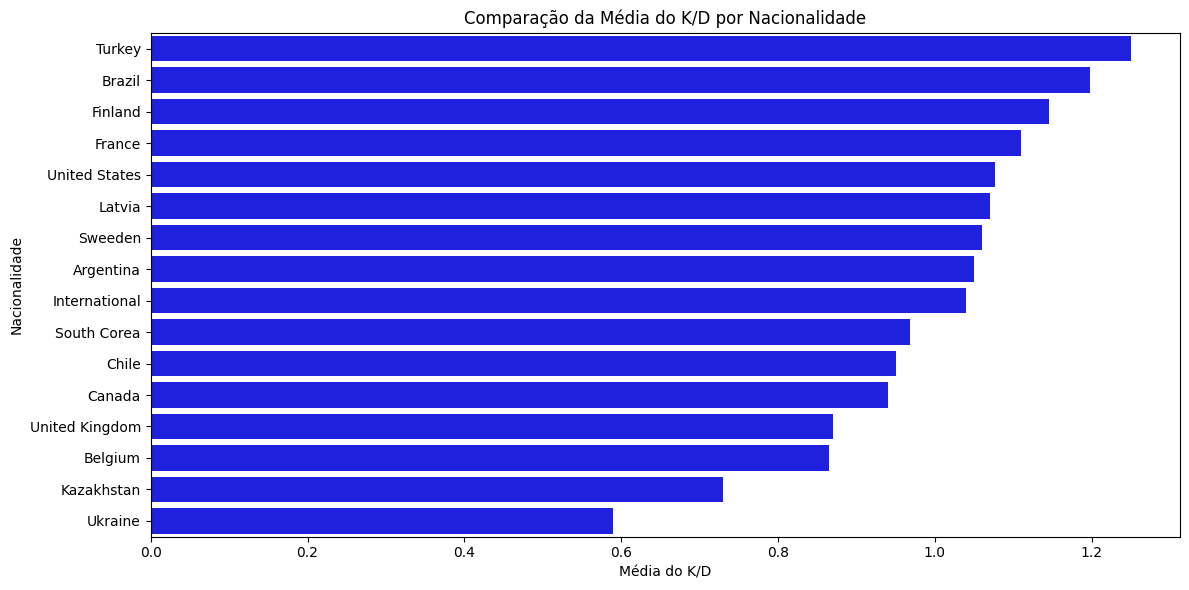

In [17]:
# Criar um gráfico de barras para comparar a média do K/D Ratio ou do Rank por região
plt.figure(figsize=(12, 6))

# Comparar pelo K/D
sns.barplot(x='K/D', y='Nationality', data=region_kd_rank, color='blue')  #comparar pelo K/D

plt.xlabel('Média do K/D')
plt.ylabel('Nacionalidade')
plt.title('Comparação da Média do K/D por Nacionalidade')
plt.tight_layout()

# Salvar o gráfico como um arquivo de imagem
plt.savefig('desempenho_medio_por_nacionalidade.png')

# Exibir o gráfico
plt.show()

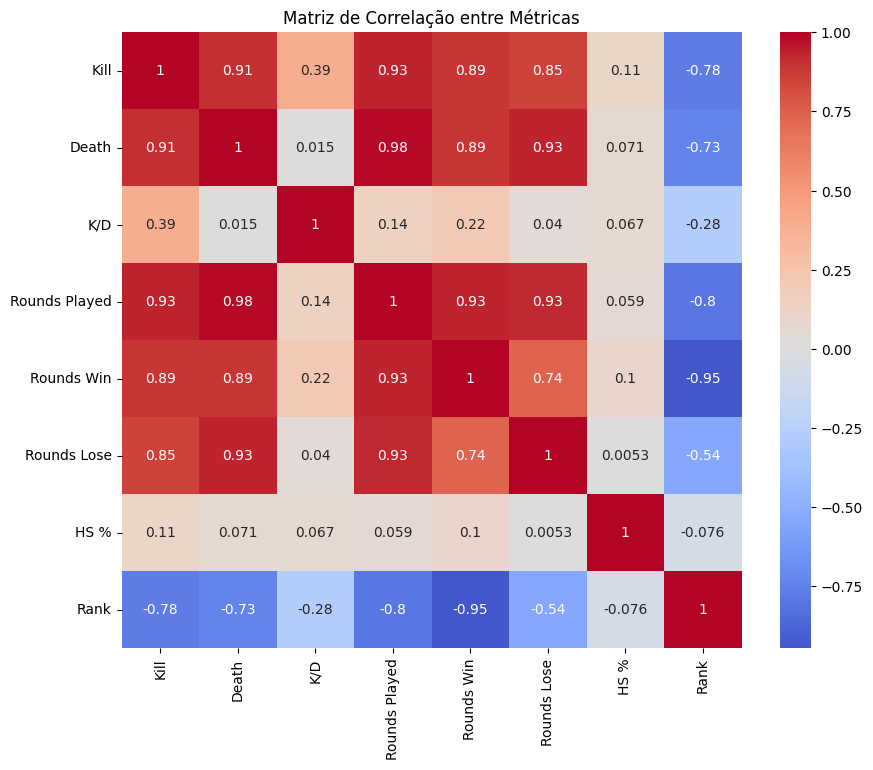

In [18]:
# Criar um mapa de calor para visualizar a matriz de correlação
plt.figure(figsize=(10, 8))

# Criar o mapa de calor com a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Matriz de Correlação entre Métricas')

# Salvar o gráfico como um arquivo de imagem
plt.savefig('matriz_de_correlação_entre_metricas.png')

# Exibir o gráfico
plt.show()

Salvando o DataFrame combinado em um único arquivo CSV

In [23]:
# Combinando os DataFrames Para salvar os dados em Um unico CSV
combined_df = pd.concat([team_kd_rank, region_kd_rank, correlation_matrix], axis=1)

# Salvando o DataFrame combinado em um único arquivo CSV
combined_df.to_csv('novos_dados.csv', index=False)